<img src='letscodebr_cover.jpeg' align='left' width=100%/>

# Setup

Para trabalhar com geopandas talvez voc6e queira criar um [novo ambiente no Anaconda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) e instalar algumas bibliotecas seguindo estas instruções. No Prompt do Anaconda no Windows e no terminal no Linux ou Mac, iremos executar uma a uma estas linhas:


<code>conda create --yes --name dhdsblend2021_geopandas python=3.7</code>

<code>conda activate dhdsblend2021_geopandas</code>

<code>conda install jupyterlab=2.2.6</code>

<code>conda install -c conda-forge pyproj=2.4.2.post1</code>

<code>conda install -c conda-forge descartes=1.1.0</code>

<code>conda install -c conda-forge geopandas=0.8.1</code>

<code>conda install -c conda-forge geopy=2.0.0</code>

Assim que as bibliotecas forem instaladas, fechamos o jupyter lab e o iniciamos novamente **a partir do ambiente recém-criado** Depois de fazer isso, as importações na próxima célula devem funcionar sem erro.

# Ada Tech [DS-PY-004] Técnicas de Programação I (PY) Aulas 4 e 5 : GeoPandas - Dados Geoespaciais.

In [1]:
#!pip install geopandas
#!pip install descartes

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj


# GeoPandas



## Sistemas de Información Geográfica (GIS)


<a id="section_intro"></a> 
###  Intro

Um Sistema de Informações Geográficas (SIG), ou [Geographic Information System (GIS)](https://www.esri.com/en-us/what-is-gis/overview), é um sistema que cria, gerencia, analisa e mapeia todos os tipos de dados. O SIG conecta dados a um mapa, integrando dados de localização (onde as coisas estão) com todos os tipos de informações descritivas (como as coisas são lá). Isso fornece uma base para mapeamento e análise que é usada na ciência e em quase todos os setores. O SIG ajuda os usuários a entenderem padrões, relacionamentos e contexto geográfico. Os benefícios incluem melhor comunicação e eficiência, bem como melhor gestão e tomada de decisões.

Os [Sistemas de Informação Geográfica](https://www.nationalgeographic.org/encyclopedia/geographic-information-system-gis/) são definidos como sistemas que permitem o armazenamento de dados geoespaciais para consulta, manipulação e representação. A representação destes dados é o campo de estudo da [Cartografia](https://unearthlabs.com/blog/modern-cartography/). A partir do trabalho com o SIG, nasceu uma nova disciplina científica, conhecida como [Ciência da Informação Geográfica](https://catalog.uconn.edu/college-of-liberal-arts-and-sciences/geographic-information-science/).

<div>
    <div class = "mapa">
        <img src='img/SIG.jpg' alt="Exemplo de SIG" width=30% height=40%>
        <p><i>Exemplo de SIG</i></p>
    </div>
</div>

Ciência da Informação Geográfica [Dados geoespaciais](https://www.ibm.com/topics/geospatial-data), também chamados de informações geográficas, geodados ou simplesmente dados espaciais, são dados georreferenciados. [Georreferenciamento](https://pro.arcgis.com/en/pro-app/latest/help/data/imagery/overview-of-georeferencing.htm) é a técnica de posicionamento espacial de uma entidade em uma localização geográfica única e bem definida em um [sistema de coordenadas](https://www.britannica.com/science/coordinate-system).

Os geodados possuem informação *implícita* (número de habitantes, referência cadastral, endereço postal, etc.) ou *explícita* (coordenadas obtidas a partir de dados capturados por GPS, etc.).

A justificativa para o uso de um GIS (GIS) é o gerenciamento de informações geoespaciais. O sistema permite que as informações sejam separadas em diferentes camadas temáticas e as armazene de forma independente.


<div class = "mapa">
    <img src='img/camadas.PNG' alt="Varias capas temáticas" width=30% height=40%>
    <p><i>Varias capas temáticas</i></p>
</div>


Ejemplos de uso de SIG: localización de lugares, cálculo de rutas óptimas, relación entre localidades usando variables geoespaciales asociadas a ellas, por ejemplo, pozos petroleros cercanos con igual profundidad, etc.


Exemplos de uso de GIS: 

- Localização de locais, 

- Cálculo de rotas ótimizadas, 

- Relacionamento entre locais usando variáveis geoespaciais associadas a eles, por exemplo, poços de petróleo próximos com igual profundidade, etc.

### Sistema de coordenadas geográficas

O sistema mais comum é aquele que referencia uma posição espacial por sua [latitude](https://www.britannica.com/science/latitude) e [longitude](https://www.nationalgeographic.org/activity/introduction-latitude-longitude/). Se considerarmos a Terra como uma esfera (ou esferóide), existem duas linhas fundamentais: o [meridiano de Greenwich](https://www.britannica.com/place/Greenwich-meridian), que vai de um pólo a outro, e o [Equador](https://www.britannica.com/place/Equator), que cruza o eixo de rotação através do centro da esfera. As linhas paralelas ao Equador são chamadas de <b> latitude </b> e as linhas paralelas a Greenwich, <b> longitude </b>.

<div class = "mapa">
    <img src='img/latitude-e-longitude.jpeg' alt="Latitud y Longitud" width=40% height=30%>
    <p><i>Latitude e Longitude</i></p>
</div>
      
A <i> latitude </i> é indicada com valores positivos entre $0$ e $90$ para as linhas ao norte do Equador, e com valores negativos entre $0$ e $-90$ para as que estão ao sul. Outra forma de nomeá-los é sempre usar um valor positivo entre $0$ e $90$ e adicionar se corresponde a Norte ou Sul.
      
A <i> longitude </i> é indicada de forma semelhante, mas com valores positivos entre $0$ e $180$ para as linhas a leste de Greenwich, e com valores negativos entre $0$ e $-180$ para aquelas a oeste. Outra forma de nomeá-los é sempre usar um valor positivo entre $0$ e $180$ e adicionar se corresponde a leste ou oeste.

Uma medição usando graus, minutos e segundos também pode ser usada como coordenadas geográficas. Dois dados são necessários: quantos graus em relação ao Equador, ao Norte ou Sul, e quantos graus em relação ao Meridiano de Greenwich, ao Leste ou Oeste.

### Tipos de Datos Geoespaciales

Existem dois tipos de dados geoespaciais em um GIS: [raster](https://grindgis.com/gis/difference-between-raster-and-vector-data-gis) e [vetor](https://gisgeography.com/spatial-data-types-vector-raster/).

#### Tipos Raster de Dados 

O tipo de dados [raster](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/) é o que consideramos imagens digitais ou mapas. Eles são representados por malhas ou quadrados; divide o espaço em células regulares onde cada uma representa um único valor. Semelhante à fotografia digital, em que o pixel é a menor unidade de informação em uma imagem e uma combinação desses pixels cria uma imagem.

Este tipo de dado se concentra nas propriedades do espaço, por exemplo, elevações em um terreno, nível de luz, variedade de culturas. Não sendo tão preciso na localização no espaço.


<div>
    <div class = "mapa">
        <img src='img/GIS_RASTER_VECTOR.PNG' alt="Tipo Raster de dado" width=30% height=40%>
        <p>
            <i>Tipo Raster de dado</i>
        </p>
    </div>
    <div class = "mapa">
        <img src='img/GIS_RASTER_VECTOR_PIXEL.PNG' alt="Tipo Raster de dado pixelado" width=30% height=40%>
        <p>
            <i>Tipo Raster de dado pixelado</i>
        </p>
    </div>
</div>

#### Tipos Vetorial de Dados 

O tipo de dados [vetorial](https://datacarpentry.org/organization-geospatial/02-intro-vector-data/) representa objetos que vêm de várias fontes: localidades, empresas, bairros, rotas, nível de contaminação, etc. São dados discretos, ou seja, com limites definidos. E com uma localização precisa no espaço.

<div>
    <div class = "mapa">
        <img src='img/Vetorial.PNG' alt="Tipo de dato Vectorial" width=30% height=40%>
        <p>
            <i>Tipo Vetorial de dado </i>
        </p>
    </div>
</div>

Três [elementos geométricos](https://www.igismap.com/gis-tutorial-basic-spatial-elements-points-lines-and-polygons/) são usados para modelar digitalmente os objetos: o ponto, a linha e o polígono.

<div>
    <div class = "mapa">
        <img src='img/Vetorial2.PNG' alt="Elementos geométricos" width=30% height=40%>
        <p><i>Elementos geométricos</i></p>
    </div>
</div>

**pontos** são usados para características geográficas que podem ser melhor expressas por um único ponto de referência. Por exemplo, estações de metrô, edifícios, locais de poços, pontos de interesse.

**Linhas unidimensionais ou polilinhas** são usadas para recursos lineares como rios, estradas, ferrovias, linhas de levantamento ou curvas de nível. Em elementos lineares, *distância* pode ser medida.

**Polígonos** são usados para representar características geográficas que cobrem uma área específica da superfície da Terra. Por exemplo, lagos, limites de parques naturais, reservatórios, províncias. Com eles você pode medir o *perímetro* e a *área*.

Lembre-se que em ambos os tipos de dados precisamos das coordenadas da sua localização geográfica.

<div>
    <div class = "mapa">
        <img src='img/Mapa_Combinado.PNG' alt="Tipo de datos combinados" width=40% height=50%>
        <p><i>Tipo combinado de dados. Raster e Vetorial</i></p>
    </div>
</div>

### Arquivos de dados geoespaciais


Geralmente, o formato GIS se refere a formatos de arquivo com dados geoespaciais. Os dados geoespaciais do tipo *raster* são armazenados nos tipos de arquivo que conhecemos para o armazenamento de imagens. Por exemplo, os formatos TIFF, JPEG, PNG, etc. Os dados geoespaciais mais comuns do tipo *vetor* são:

- SHP (Shapefile): O [shapefile](https://enterprise.arcgis.com/pt-br/portal/latest/use/shapefiles.htm) é o tipo mais comum de arquivo geoespacial. Todos os formatos comerciais e de código aberto aceitam shapefiles como formatos GIS. Tornou-se o padrão da indústria. Ele não é um único arquivo, um shapefile é composto de vários arquivos que são lidos como um só. O mínimo necessário é três: o .shp armazena as entidades geométricas, o .shx armazena o índice das entidades geométricas e o .dbf é o banco de dados, no formato dBASE. Opcionalmente, você pode ter um .prj, .sbn, .sbx, .fbn, .fbx, .ain, .aih, .shp, .xml.

- CSV / GeoCSV: CSV (Comma-separated values): representa os dados em forma de tabela separados por vírgulas. É utilizado para armazenar informações alfanuméricas com a possibilidade de armazenar as coordenadas e posteriormente transformá-las em uma figura geométrica. É comum encontrá-los em publicações de organizações. A vantagem é que esses arquivos ocupam pouco espaço e são fáceis de compartilhar. O [GeoCSV](https://giswiki.hsr.ch/GeoCSV) é o formato de arquivo tabular CSV com uma extensão de geometria espacial opcional. Possui duas variantes: a opção Ponto X / Y ou a opção WKT. A opção WKT é a opção preferida, pois o construtor é armazenado em uma única coluna do tipo String, por exemplo "POINT (-4,5454 45,2211)", que significa -4,5454 oeste e 45,2211 norte (longitude / latitude). Esta opção oferece suporte aos tipos de geometria Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon e até mesmo GeometryCollection e ARCos. A opção Ponto X / Y só pode armazenar pontos.

- GeoJSON (Javascript Object Notation): É um formato de troca de dados geoespaciais baseado em JSON. [GeoJSON](https://geojson.org/) define a gramática com base no padrão WKT.

- KMZ/KML (Keyhole Markup Language): KML significa [Keyhole Markup Language](https://developers.google.com/kml). Este formato GIS é baseado em XML e é usado principalmente pelo Google Earth. KML foi desenvolvido pela Keyhole Inc., que mais tarde foi adquirida pelo Google. [KMZ](https://developers.google.com/kml/documentation/kmzarchives) (KML-Zipped) substituiu KML como o formato geoespacial padrão para o Google Earth porque é uma versão compactada do arquivo. KML / KMZ se tornou um padrão internacional do [Open Geospatial Consortium](https://www.ogc.org/) em 2008.

- OSM (OpenStreetMap): [OpenStreetMap](https://www.openstreetmap.org/) é o maior projeto de dados GIS aberto que fornece dados de mapas para milhares de sites, aplicativos móveis e dispositivos de hardware.

- PostGIS + PostgreSQL: O [PostGIS](https://postgis.net/) de código aberto estende o banco de dados [PostgreSQL](https://www.postgresql.org/) com dados geoespaciais.

Com <b>GeoPandas</b> muitos desses tipos de arquivo podem ser lidos usando a função `geopandas.read_file()`.

#### Exemplos de arquivos de dados geoespaciais

- Arquivo com formato **GeoCSV**: É um arquivo csv, com dados dos bairros de Buenos Aires, com extensão geoespacial registrada na coluna WKT. Esta coluna contém o elemento geométrico *Polygon* que representa o limite de cada vizinhança.  

In [3]:
barrios = gpd.read_file("../Data/Neighborhoods.csv", encoding = 'latin1')
barrios.head()

,WKT,NEIGHBORHOOD,COMMUNE,PERIMETER,AREA,geometry
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.00000000000,7725.69522770465,3118100.97239645380,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.00000000000,7087.51329532852,2229829.03362795900,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.00000000000,8132.69934845057,3613583.69021913320,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.00000000000,7705.38979708046,3399595.64148383770,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.00000000000,8537.90136849144,4050752.24523803680,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


- Arquivo em formato **SHP**: Gera um quadro de dados com uma coluna especial chamada geometria, que contém a figura geoespacial. Nesse caso, são dois polígonos que compõem o contorno de um parque nacional.

In [4]:
parque = gpd.read_file("../Data/parque_reserva.shp")
parque.head()

,geometry
0,"POLYGON ((756107.121 7150870.957, 756106.485 7..."
1,"POLYGON ((756107.121 7150870.957, 756115.780 7..."


<Axes: >

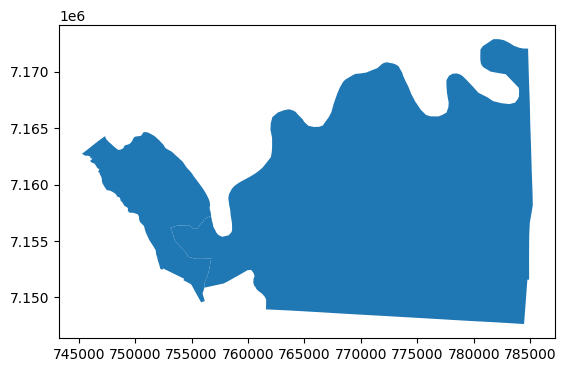

In [5]:
parque.plot()

Leia o arquivo "../Data/metro_stations.csv" e explique o conteúdo. Que tipo de arquivo geoespacial é? Qual é o formato?

### Referências

- [GeoPandas 0.9.0](https://geopandas.org)

- [Geopandas](https://towardsdatascience.com/tagged/geopandas)

- [Plotting with Geoplot and GeoPandas](https://geopandas.org/gallery/plotting_with_geoplot.html)